# EP 5
## Artur Magalhães Rodrigues dos Santos - 10297734

A proposta do EP é a de classificar os dígitos de 0 a 4, utilizando os algoritmo de SVM e redes neurais, ambos do *sklearn*.

In [1]:
from keras.datasets import mnist
from sklearn import svm
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
import time as t

Using TensorFlow backend.


# Recebendo o dataset

Os dados são carregados pela função *load\_data*, em que já podemos selecionar o número de classes desejadas.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print('MNIST train set shape: ', x_train.shape, ' with labels shape: ', y_train.shape)

print('MNIST test set shape: ', x_test.shape, ' with labels shape: ', y_test.shape)


MNIST train set shape:  (60000, 28, 28)  with labels shape:  (60000,)
MNIST test set shape:  (10000, 28, 28)  with labels shape:  (10000,)


Carregamos o dataset, agora iremos visualizar alguns exemplos, como no EP4.

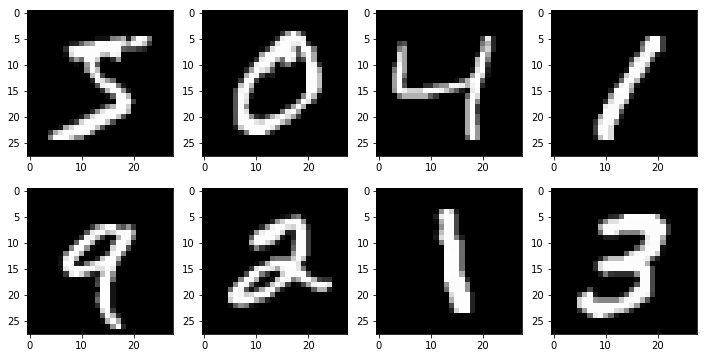

In [4]:
%matplotlib inline

fig, ax = plt.subplots(2, 4, figsize = (12, 6))

for i in range(8):
    ax[i//4, i%4].imshow(x_train[i], cmap='gray')

Vejamos quantos elementos pertencem as classes.

In [5]:
label_count = [0 for i in range(10)]
print('Label count: ', label_count)
for label in y_train:
    label_count[label] += 1
print('Label count: ', label_count)

Label count:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Label count:  [5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


# Manipulando a entrada

Portanto, temos:
- Classe 0: 5923
- Classe 1: 6742
- Classe 2: 5958
- Classe 3: 6131
- Classe 4: 5842
- Classe 5: 5421
- Classe 6: 5918
- Classe 7: 6265
- Classe 8: 5851
- Classe 9: 5949

Agora, iremos selecionar os 500 valores de cada classe que irão compor X\_train. Portanto, 500 valores das classes i, i = 0, 1, 2, 3, 4

In [6]:
selected_examples = []

for i in range(0, 5):
    count = 0
    for j in range(len(x_train)):
        if y_train[j] == i:
            if count >= 500:
                break
            selected_examples.append((x_train[j], y_train[j]))
            count += 1
        
selected_examples = np.array(selected_examples)

Confirmando que temos 500 elementos de cada classe:

In [7]:
print(len(selected_examples))
print(selected_examples.shape)

2500
(2500, 2)


X: 


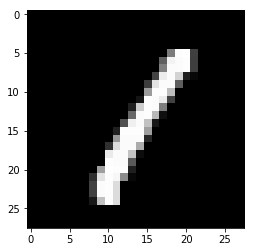

Class:  1


In [8]:
print('X: ')
plt.imshow(selected_examples[500][0], cmap='gray', vmin=0, vmax=255)
plt.show()
print('Class: ', selected_examples[500][1])

Agora, iremos verificar os shapes de **X_train** e **Y_train**. Podemos notar que os valores de **X_train** ainda não sofreram o *flattening*, e ainda modicaremos a forma.

X_train_tmp shape:  (2500,)
Shape do valor em [0]:  (28, 28)
X_train_tmp[0]: 


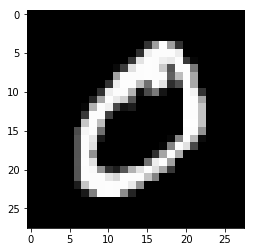

Value at Y_train_tmp[0]:  0
Y_train shape:  (2500,)


In [9]:
X_train_tmp = selected_examples[:, 0]
Y_train_tmp = selected_examples[:, 1]
print('X_train_tmp shape: ', X_train_tmp.shape)
print('Shape do valor em [0]: ', X_train_tmp[0].shape)
print('X_train_tmp[0]: ')
plt.imshow(X_train_tmp[0], cmap='gray', vmin=0, vmax=255)
plt.show()
print('Value at Y_train_tmp[0]: ', Y_train_tmp[0])
print('Y_train shape: ', Y_train_tmp.shape)

In [10]:
n = len(X_train_tmp)
m = len(Y_train_tmp)

Iremos permutar os valores, de forma que acessamos valores aleatórios:

In [11]:
perm = np.random.permutation(n)
X_train_tmp = X_train_tmp[perm]
Y_train_tmp = Y_train_tmp[perm]

In [12]:
X_train_tmp[0].shape

(28, 28)

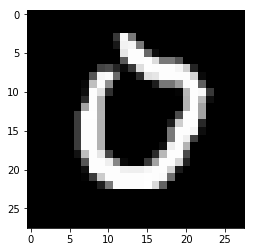

Value at Y_train_tmp[0]:  0


In [13]:
plt.imshow(X_train_tmp[0], cmap='gray', vmin=0, vmax=255)
plt.show()
print('Value at Y_train_tmp[0]: ', Y_train_tmp[0])

Na sequência, realizamos o *flattening* dos valores de **X_train**, modificando o *shape* para um array unidimensional com 784 colunas.

In [14]:
for i in range(n):
    X_train_tmp[i] = X_train_tmp[i].reshape((1, 784))

print(X_train_tmp.shape)
print(X_train_tmp[0].shape)

(2500,)
(1, 784)


In [15]:
X_train_tmp[0].shape

(1, 784)

In [16]:
type(X_train_tmp)

numpy.ndarray

Normalizando o vetor - escalando para valores entre 0 e 1:

In [17]:
X_train = []
max_value = 255
for line in X_train_tmp:
    X_train.append(line[0]/max_value)
X_train = np.array(X_train)

In [18]:
X_train[0].shape

(784,)

In [19]:
Y_train = []
for i in range(m):
    Y_train.append(int(Y_train_tmp[i]))
Y_train = np.array(Y_train)

In [20]:
Y_train[0]

0

Os shapes finais do conjunto de treinamento são apresentados abaixo.

In [21]:
print('X_train shape: {}'.format(X_train.shape))
print('Y_train shape: {}'.format(Y_train.shape))

X_train shape: (2500, 784)
Y_train shape: (2500,)


Os valores mínimos e máximos de cada um deles:

In [22]:
print('Valor mínimo: {} e o valor máximo: {} de X_train'.format(np.min(X_train), np.max(X_train)))
print('Valor mínimo: {} e o valor máximo: {} de Y_train'.format(np.min(Y_train), np.max(Y_train)))

Valor mínimo: 0.0 e o valor máximo: 1.0 de X_train
Valor mínimo: 0 e o valor máximo: 4 de Y_train


Faremos as mesmas etapas para obter **X_test** e **Y_test**, a única diferença sendo que eles irão conter todos os exemplos de cada uma das classes desejadas (0 a 4).

In [23]:
selected_test_examples = []

for i in range(0, 5):
    for j in range(len(x_test)):
        if y_test[j] == i:
            selected_test_examples.append((x_test[j], y_test[j]))
            
selected_test_examples = np.array(selected_test_examples)
print('Total de valores selecionados (todos com labels de 0 a 4 em x_test): ', len(selected_test_examples))

Total de valores selecionados (todos com labels de 0 a 4 em x_test):  5139


Selecionando **X_test** e **Y_test**, e verificando os shapes:

In [24]:
X_test_tmp = selected_test_examples[:, 0]
Y_test_tmp = selected_test_examples[:, 1]
print('X_test_tmp shape: ', X_test_tmp.shape)
print('Value at X_test_tmp[0]: ', X_test_tmp[0].shape)
print('Y_test_tmp shape: ', Y_test_tmp.shape)
print('Valeu at [0]: ', Y_test_tmp[0])

X_test_tmp shape:  (5139,)
Value at X_test_tmp[0]:  (28, 28)
Y_test_tmp shape:  (5139,)
Valeu at [0]:  0


In [25]:
n_test = len(X_test_tmp)
m_test = len(Y_test_tmp)

Permutando os elementos dentro das duas matrizes:

In [26]:
perm_test = np.random.permutation(n_test)
X_test_tmp = X_test_tmp[perm_test]
Y_test_tmp = Y_test_tmp[perm_test]

Realizando o *flattening*:

In [27]:
for i in range(n_test):
    X_test_tmp[i] = X_test_tmp[i].reshape((1, 784))
print(X_test_tmp.shape)
print(X_test_tmp[0].shape)

(5139,)
(1, 784)


Normalizando:

In [28]:
X_test = []
max_test_value = 255
for line in X_test_tmp:
    X_test.append(line[0]/max_test_value)
X_test = np.array(X_test)

In [29]:
Y_test = []
for line in Y_test_tmp:
    Y_test.append(int(line))
Y_test = np.array(Y_test)

Os shapes finais do conjunto de testes:

In [30]:
print('X_test shape: {}'.format(X_test.shape))
print('Y_test shape: {}'.format(Y_test.shape))

X_test shape: (5139, 784)
Y_test shape: (5139,)


Os valores mínimos e máximos de cada um deles:

In [31]:
print('Valor mínimo: {} e o valor máximo: {} de X_test'.format(np.min(X_test), np.max(X_test)))
print('Valor mínimo: {} e o valor máximo: {} de Y_test'.format(np.min(Y_test), np.max(Y_test)))

Valor mínimo: 0.0 e o valor máximo: 1.0 de X_test
Valor mínimo: 0 e o valor máximo: 4 de Y_test


# Treinamento e validação

Guardamos os folds em um vetor:

In [32]:
num_folds = 5
frac = 1/num_folds
fold_size = int(frac * n)
X_folds = [None for i in range(num_folds)]
Y_folds = [None for i in range(num_folds)]
for i in range(num_folds):
    X_folds[i] = X_train[i * fold_size : (i + 1) * fold_size]
    Y_folds[i] = Y_train[i * fold_size : (i + 1) * fold_size]

Recapitulando o que temos em cada um dos vetores:

In [33]:
print('X_folds na casa i tem shape {}, e do tipo {}'.format(X_folds[0].shape, type(X_folds[0])))
print('Cada linha na casa i tem shape {}'.format(X_folds[0][0].shape))
print('E representa um exemplo:')
print(X_folds[0][0], ' do tipo ', type(X_folds[0][0]))

X_folds na casa i tem shape (500, 784), e do tipo <class 'numpy.ndarray'>
Cada linha na casa i tem shape (784,)
E representa um exemplo:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0. 

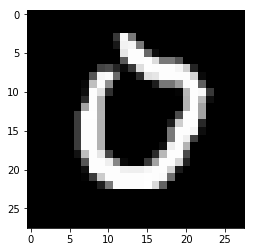

In [34]:
plt.imshow(X_folds[0][0].reshape(28,28)*255, cmap='gray')
plt.show()

In [35]:
print('Y_folds na casa i tem shape {}, e tipo {}'.format(Y_folds[0].shape, type(Y_folds[0])))
print('Cada linha na casa i tem valor {}'.format(Y_folds[0][0]))
print('E representa um label:')
print(Y_folds[0][0], ' de tipo ', type(Y_folds[0][0]))

Y_folds na casa i tem shape (500,), e tipo <class 'numpy.ndarray'>
Cada linha na casa i tem valor 0
E representa um label:
0  de tipo  <class 'numpy.int64'>


Checando quantos elementos estão em cada *fold*, podemos garantir que eles foram gerados da maneira apropriada.

In [36]:
for i in range(0, 5):
    print("Fold {} contains {} elements for X".format(i, len(X_folds[i])))
    print("Fold {} contains {} elements for Y\n".format(i, len(Y_folds[i])))

Fold 0 contains 500 elements for X
Fold 0 contains 500 elements for Y

Fold 1 contains 500 elements for X
Fold 1 contains 500 elements for Y

Fold 2 contains 500 elements for X
Fold 2 contains 500 elements for Y

Fold 3 contains 500 elements for X
Fold 3 contains 500 elements for Y

Fold 4 contains 500 elements for X
Fold 4 contains 500 elements for Y



Para efetuar o *cross validation*, iremos escolher os classificadores com base na sugestão do enunciado:
- classificador SVM, kernel RBF, $\gamma = 0.05$ e $C = 5$ 
- *Multi-layer perceptron* com duas camadas ocultas, escolhendo o número de nós e o *learning rate*.

In [37]:
svm_scores = []
nn_scores = []

In [38]:
s = t.time()

for i in range(num_folds):
    ts = t.time()
    # seleciono um fold
    print('\n#######################\nFold {} selecionado para validação'.format(i))
    x_val = X_folds[i] 
    y_val = Y_folds[i] 
    print('Shape do X de validação: {}'.format(x_val.shape))
    print('Shape do y de validação: {}'.format(y_val.shape))

    X_remain_folds = []
    Y_remain_folds = []
    for k in range(num_folds):
        if k != i:
            for elem in range(fold_size):
                X_remain_folds.append(X_folds[k][elem])
                Y_remain_folds.append(Y_folds[k][elem])
    print('{} elementos selecionados para treino'.format(len(X_remain_folds)))

    X_remain_folds = np.array(X_remain_folds)
    Y_remain_folds = np.array(Y_remain_folds)
    print('Dimensões do set X de treino: {}'.format(X_remain_folds.shape))
    print('Dimensões do set y de treino: {}'.format(Y_remain_folds.shape))
    
    # classificacao
    print('\nRealizando o fit...')
    svm_clf = svm.SVC(kernel='rbf', C = 5.0, gamma=0.05)
    nn_clf = MLPClassifier(hidden_layer_sizes=(100, 50, 10), learning_rate_init=0.01)
    print('\tFit SVM...')
    svm_time = t.time()
    svm_clf.fit(X_remain_folds, Y_remain_folds)
    print('\tFit SVM terminado! (Tempo: {:.3f})'.format(t.time() - svm_time))
    
    print('\tFit MLP...')
    nn_time = t.time()
    nn_clf.fit(X_remain_folds, Y_remain_folds)
    print('\tFit MLP terminado! ')
    print('Fit realizado! (Tempo: {:.3f})'.format(t.time() - nn_time))

    # calculo os scores
    print('\nCalculando os scores...')
    svm_score = svm_clf.score(x_val, y_val)
    nn_score = nn_clf.score(x_val, y_val)
    print('SVM score: {}'.format(svm_score))
    print('NN score: {}'.format(nn_score))
    svm_scores.append(svm_score)
    nn_scores.append(nn_score)
    print('Time: {:.2f}\n'.format(t.time() - ts))

print('Tempo final: {:.2f}'.format(t.time() - s))
print('Scores do SVM: {} com média {}'.format(svm_scores, np.mean(svm_scores)))
print('Scores da NN: {} com média {}'.format(nn_scores, np.mean(nn_scores)))


#######################
Fold 0 selecionado para validação
Shape do X de validação: (500, 784)
Shape do y de validação: (500,)
2000 elementos selecionados para treino
Dimensões do set X de treino: (2000, 784)
Dimensões do set y de treino: (2000,)

Realizando o fit...
	Fit SVM...
	Fit SVM terminado! (Tempo: 82.759)
	Fit MLP...
	Fit MLP terminado! 
Fit realizado! (Tempo: 28.921)

Calculando os scores...
SVM score: 0.974
NN score: 0.974
Time: 122.36


#######################
Fold 1 selecionado para validação
Shape do X de validação: (500, 784)
Shape do y de validação: (500,)
2000 elementos selecionados para treino
Dimensões do set X de treino: (2000, 784)
Dimensões do set y de treino: (2000,)

Realizando o fit...
	Fit SVM...
	Fit SVM terminado! (Tempo: 77.070)
	Fit MLP...
	Fit MLP terminado! 
Fit realizado! (Tempo: 15.117)

Calculando os scores...
SVM score: 0.982
NN score: 0.974
Time: 100.31


#######################
Fold 2 selecionado para validação
Shape do X de validação: (500, 784)
S

Os resultados dos *scores* podem ser observados abaixo.

In [39]:
print('Scores do SVM são {}, o maior deles sendo {}'.format(svm_scores, max(svm_scores)))
print('Scores do MLP são {}, o maior deles sendo {}'.format(nn_scores, max(nn_scores)))

Scores do SVM são [0.974, 0.982, 0.974, 0.974, 0.99], o maior deles sendo 0.99
Scores do MLP são [0.974, 0.974, 0.966, 0.974, 0.974], o maior deles sendo 0.974


Para SVM, validar com o fold 5 levou a um melhor resultado de classificação.

Para MLP, validar com o fold 5 levou a um melhor resultado de classificação.

A título de curiosidade, podemos testar a validação cruzada do *sklearn*.

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
clf = svm.SVC(kernel='rbf', C = 5.0, gamma=0.05)
s = t.time()
scores = cross_val_score(clf, X_train, Y_train, cv=5)
print('Tempo decorrido: {:.2f}'.format(t.time() - s))
print('Resultados obtidos: {}'.format(scores))

Tempo decorrido: 64.28
Resultados obtidos: [0.974 0.982 0.976 0.972 0.988]


Os classificadores obtiveram resultados próximos em suas respectivas melhores performances. Entretanto, a média nos indica que o SVM apresentou melhores resultados, e portanto, iremos selecioná-lo.

In [42]:
# criando o classificador
best_svm_clf = svm.SVC(kernel='rbf', C=5.0, gamma=0.05)
# score no teste
y_pred = best_svm_clf.fit(X_train, Y_train).predict(X_test)

In [43]:
print(type(y_pred))

<class 'numpy.ndarray'>


In [44]:
best_score = best_svm_clf.score(X_test, Y_test)
best_score

0.9852111305701499

In [45]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print('Confusion Matrix: ')
print(conf_matrix)

Confusion Matrix: 
[[ 971    0    6    3    0]
 [   0 1117   15    3    0]
 [   5    1 1015    8    3]
 [   0    0   17  990    3]
 [   1    0   11    0  970]]


O plot da matriz de confusão, mostrado a seguir, foi retirado do próprio site do [*sklearn*](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html), e demonstra os erros e acertos do modelo proposto.

In [46]:
from sklearn.utils.multiclass import unique_labels

Confusion matrix, without normalization
[[ 971    0    6    3    0]
 [   0 1117   15    3    0]
 [   5    1 1015    8    3]
 [   0    0   17  990    3]
 [   1    0   11    0  970]]
Normalized confusion matrix
[[9.90816327e-01 0.00000000e+00 6.12244898e-03 3.06122449e-03
  0.00000000e+00]
 [0.00000000e+00 9.84140969e-01 1.32158590e-02 2.64317181e-03
  0.00000000e+00]
 [4.84496124e-03 9.68992248e-04 9.83527132e-01 7.75193798e-03
  2.90697674e-03]
 [0.00000000e+00 0.00000000e+00 1.68316832e-02 9.80198020e-01
  2.97029703e-03]
 [1.01832994e-03 0.00000000e+00 1.12016293e-02 0.00000000e+00
  9.87780041e-01]]


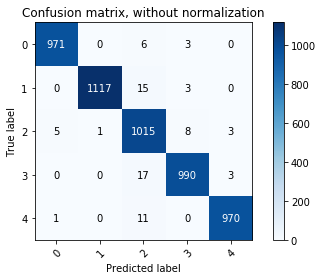

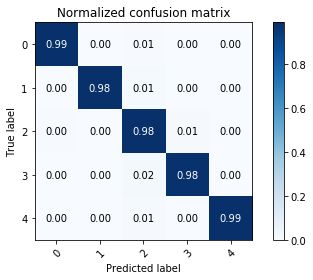

In [47]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

class_names = [0, 1, 2, 3, 4]
# Plot non-normalized confusion matrix
plot_confusion_matrix(Y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(Y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Fim do EP :)

![ml](https://media.giphy.com/media/BdrSy2gqURFEk/giphy.gif)